# Import Required Libraries
Import the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
from dhybridrpy import Dhybridrpy

# Example 1

In [2]:
def example1():
    """
    Example 1: Basic usage - Load data and print some basic information.
    """
    dpy = Dhybridrpy(
        input_file="data/inputs/input2",
        output_path="data/Output1"
    )
    
    # Print the parsed input file contents. This is a dictionary.
    print("Input file contents:")
    print(dpy.inputs)

    # Find the drift velocity for species 1 and 2 (Note: Python indexing is 
    # 0-based and dictionary keys are case-insensitive)
    print("Drift velocity for species 1:")
    print(dpy.inputs["species"][0]["vdrift"])

    print("Drift velocity for species 2:")
    print(dpy.inputs["species"][1]["vdrift"])
    
    # Print available timesteps
    print("Available timesteps:")
    print(dpy.timesteps)

# Execute example1
example1()

Input file contents:
&node_conf
    node_number(1:2) = 14, 14
/

&time
    dt = 0.0025
    c = 100
    niter = 100000
    t0 = 0.0
    stiter = 0
/

&grid_space
    ncells(1:2) = 4000, 200
    boxsize(1:2) = 2000.0, 100.0
    bdtype = 'per', 'per', 'per', 'per'
    te = 1.0
    gamma = 1.6667
/

&global_output
    dodump = .true.
    ndump = 1000
    b0 = 3.05191e-07
    n0 = 1000000.0
    units = 'NORM'
/

&restart
    do_restart = .false.
    save_restart = .true.
    restart_step = 10000
/

&ext_emf
    bx = '0.'
    by = '1.'
    bz = '0.'
    ex = '0.'
    ey = '0.'
    ez = '0.'
    n_constants = 0
/

&field_diag
    dmp_efld(1:4) = .false., .false., .true., .true.
    dmp_bfld(1:4) = .false., .false., .true., .true.
    dmp_jfld(1:2) = .true., .true.
/

&algorithm
    ifsmooth = .true.
    ifsmoothextfields = .true.
    filternpass = 8
    compensate = .true.
    subniter = 8
    allowederror = 1.0
/

&loadbalance
    loadbalance = .false.
    ifdynamicloadbalance = .false.
    

# Example 2

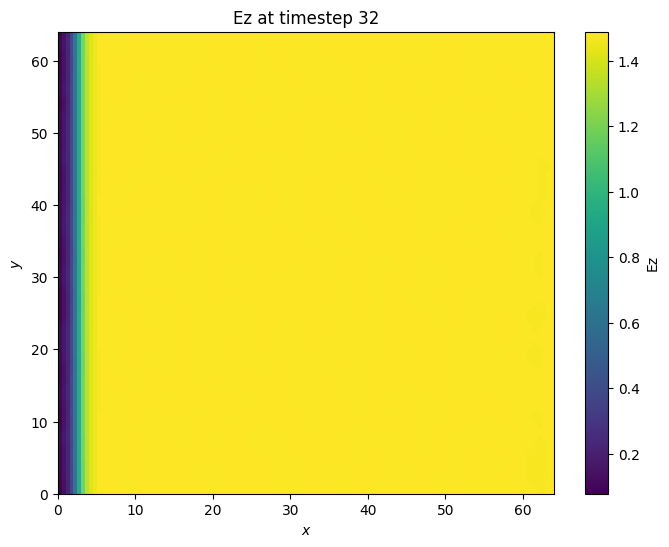

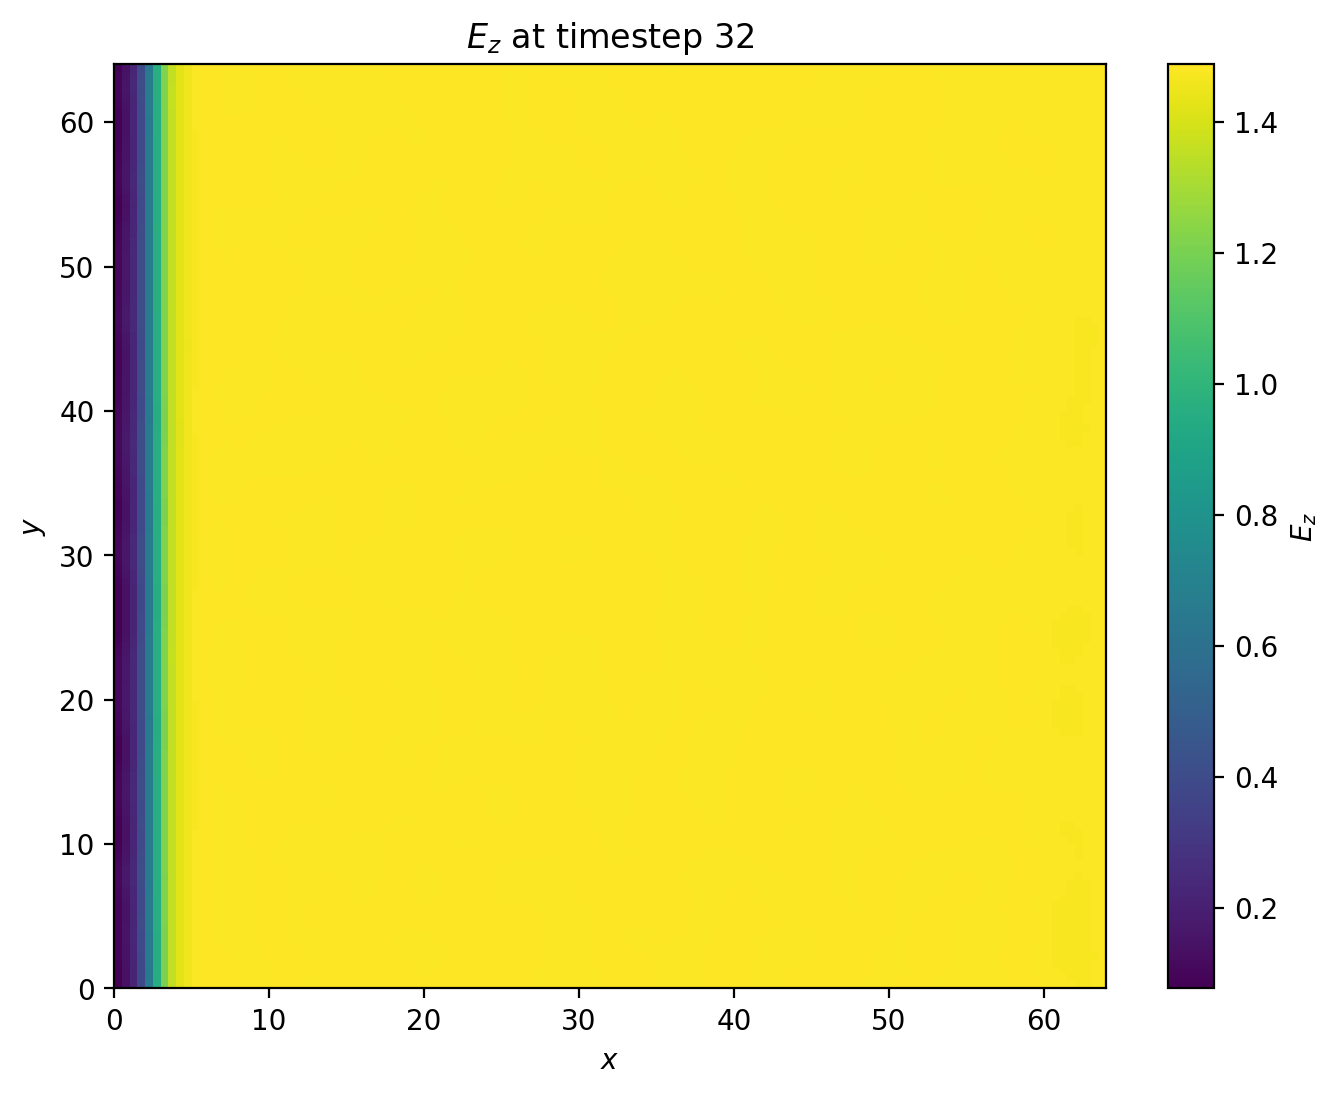

In [4]:
def example2():
    """
    Example 2: Accessing and plotting field data. Possible fields include
    x, y, z components and magnitude (Intensity) of E, B, J, and V, namely
    electric field, magnetic field, current density, and bulk velocity.
    """
    dpy = Dhybridrpy(
        input_file="data/inputs/input1",
        output_path="data/Output1"
    )
    
    # Access and plot the (total) electric field (Ez) at timestep 32
    Ez = dpy.timestep(32).fields.Ez(origin="Total")
    Ez.plot()

    # Replot with a higher DPI, different title and colorbar label, and save 
    # (by default a jpg file is saved)
    Ez.plot(
        dpi=200,
        title=rf"$E_z$ at timestep {Ez.timestep}",
        colorbar_label=r"$E_z$",
        save=True,
        save_name="example2"
    )

# Execute example2
example2()

# Example 3

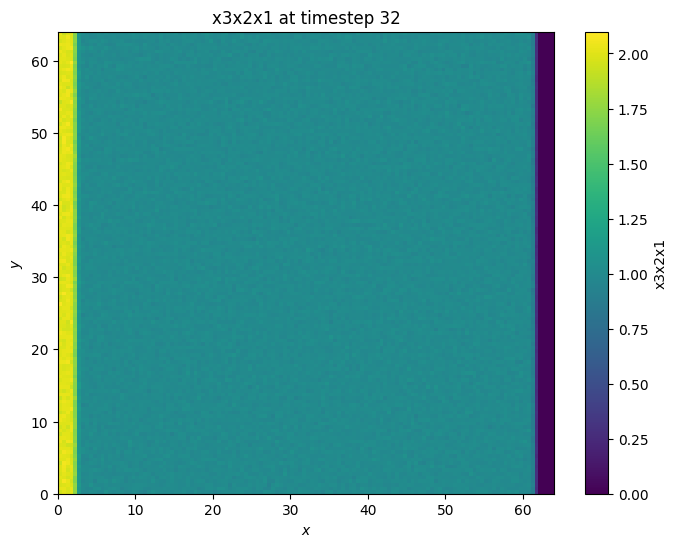

In [7]:
def example3():
    """
    Example 3: Accessing and plotting phase space data.
    """
    dpy = Dhybridrpy(
        input_file="data/inputs/input2",
        output_path="data/Output1"
    )
    
    # Access and plot the phase space data (x3x2x1) for species 1 at timestep 32
    phase_data = dpy.timestep(32).phases.x3x2x1(species=1)
    phase_data.plot()

# Execute example3
example3()

# Example 4

In [8]:
def example4():
    """
    Example 4: Grabbing field data, x and y limits, and x and y data.
    """
    dpy = Dhybridrpy(
        input_file="data/inputs/input1",
        output_path="data/Output1"
    )
    
    # Access an external magnetic field magnitude (BIntensity) at timestep 0
    BIntensity = dpy.timestep(0).fields.BIntensity(origin="External")
    
    # Grab the field's data
    print("B magnitude data:")
    print(BIntensity.data)
    
    # Grab the x and y grid limits
    print("X limits:")
    print(BIntensity.xlimdata)
    print("Y limits:")
    print(BIntensity.ylimdata)
    
    # Grab the x and y grid data
    print("X data:")
    print(BIntensity.xdata)
    print("Y data:")
    print(BIntensity.ydata)

# Execute example4
example4()

B magnitude data:
[[0.07071068 0.07071068 0.07071068 ... 0.07071068 0.07071068 0.07071068]
 [0.07071068 0.07071068 0.07071068 ... 0.07071068 0.07071068 0.07071068]
 [0.07071068 0.07071068 0.07071068 ... 0.07071068 0.07071068 0.07071068]
 ...
 [0.07071068 0.07071068 0.07071068 ... 0.07071068 0.07071068 0.07071068]
 [0.07071068 0.07071068 0.07071068 ... 0.07071068 0.07071068 0.07071068]
 [0.07071068 0.07071068 0.07071068 ... 0.07071068 0.07071068 0.07071068]]
X limits:
[ 0. 64.]
Y limits:
[ 0. 64.]
X data:
[ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75
 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
 30.25 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75
 36.25 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.

# Example 5

In [8]:
def example5():
    """
    Example 5: Creating a composite plot of density data across multiple timesteps.
    """
    dpy = Dhybridrpy(
        input_file="data/inputs/input1",
        output_path="data/Output1"
    )
    
    # Create a composite plot
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    # Obtain consistent colorbar bounds from (species 1 by default) density data.
    # This can be omitted if you don't care about consistent colorbar bounds.
    timesteps = dpy.timesteps[1:]
    all_data = [dpy.timestep(ts).phases.x3x2x1().data for ts in timesteps]
    vmin = min([data.min() for data in all_data])
    vmax = max([data.max() for data in all_data])

    # Plot density data
    for i, ts in enumerate(timesteps):
        x3x2x1 = dpy.timestep(ts).phases.x3x2x1()
        x3x2x1.plot(ax=axes[i], vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.savefig("example5.jpg", dpi=200)
    plt.show()

# Execute example5
import matplotlib
# Use a non-interactive backend
matplotlib.use('agg')
example5()